In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir(globals()['_dh'][0])
os.chdir('..')
# print(os.path.abspath(os.curdir))

In [2]:
import mitsuba as mi
try:
    mi.set_variant('llvm_ad_rgb')
except:
    pass

jit_find_library(): Unable to load "/usr/lib/llvm-14/lib/libLLVM.so": /home/sasank/anaconda3/lib/python3.11/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /usr/lib/llvm-14/lib/libLLVM.so)!


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import rfcutils
import h5py

import random
# import tensorflow as tf

get_db = lambda p: 10*np.log10(p)
get_pow = lambda s: np.mean(np.abs(s)**2, axis=-1)
get_sinr = lambda s, i: get_pow(s)/get_pow(i)
get_sinr_db = lambda s, i: get_db(get_sinr(s,i))

2023-12-21 18:53:14.528367: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-21 18:53:14.620164: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 18:53:15.350112: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-21 18:53:15.355485: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-21 18:53:17.246696: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Generate Interference Data

In [9]:
# To load the waveforms for the interference
interference_sig_type = 'EMISignal1'

with h5py.File(os.path.join('ProjectCodes','dataset', interference_sig_type+'_raw_data.h5'),'r') as data_h5file:
    sig_data = np.array(data_h5file.get('dataset'))
    sig_type_info = data_h5file.get('sig_type')[()]
    if isinstance(sig_type_info, bytes):
        sig_type_info = sig_type_info.decode("utf-8") 
print(sig_type_info)

EMISignal1


In [30]:
K = 10 #Number of interference sample from each data point
sig_len = 64*8
interference_data = np.zeros((K*len(sig_data),sig_len),dtype=np.csingle)
for i in range(len(sig_data)):
    for j in range(K):
        w = np.random.randint(len(sig_data[0])-sig_len-1)
        interference_data[i*K+j][:] = sig_data[i][w:w+sig_len]

In [33]:
with open(os.path.join('ProjectCodes','dataset', 'interference_samples.npy'),'wb') as f:
    np.save(f,interference_data)

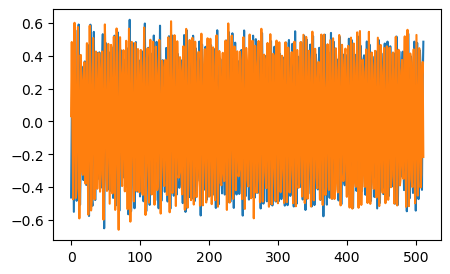

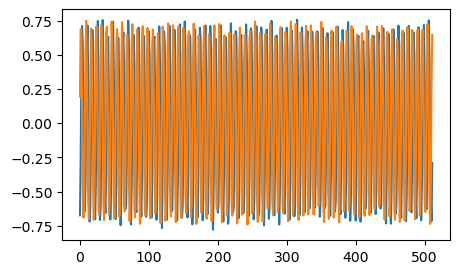

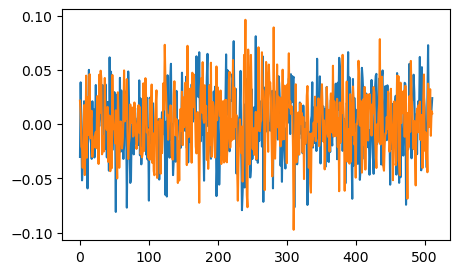

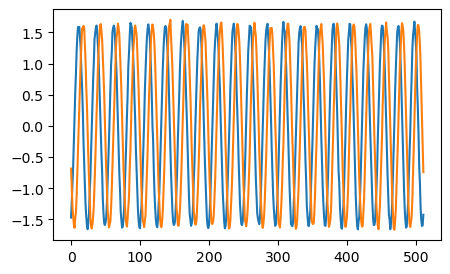

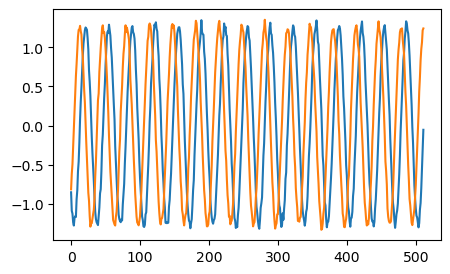

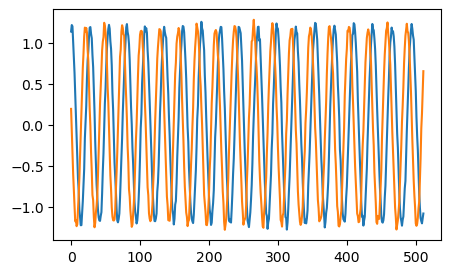

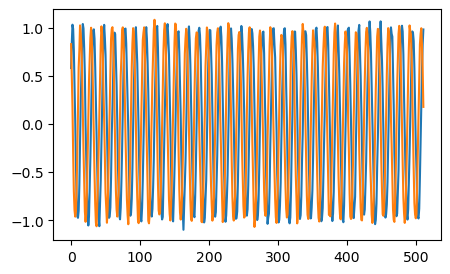

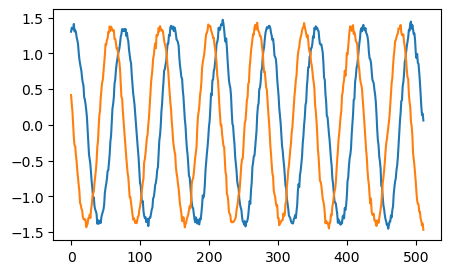

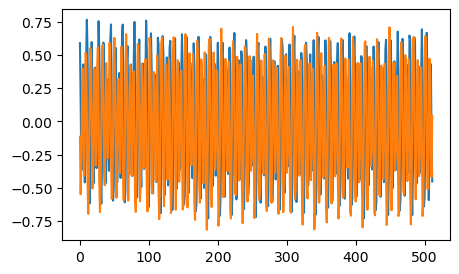

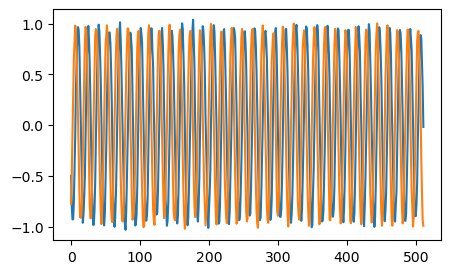

In [32]:
for i in range(10):
    plt.figure(i,figsize=(5,3))
    plt.plot(np.real(interference_data[i]))
    plt.plot(np.imag(interference_data[i]))